<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Requirements" data-toc-modified-id="Requirements-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Requirements</a></span></li><li><span><a href="#Initial-Jobless-Claims" data-toc-modified-id="Initial-Jobless-Claims-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial Jobless Claims</a></span><ul class="toc-item"><li><span><a href="#Plot-National-Initial-Unemployment-Claims-and-Unemployment-Rates" data-toc-modified-id="Plot-National-Initial-Unemployment-Claims-and-Unemployment-Rates-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plot National Initial Unemployment Claims and Unemployment Rates</a></span></li></ul></li><li><span><a href="#Vulnerability-Assessment" data-toc-modified-id="Vulnerability-Assessment-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Vulnerability Assessment</a></span></li><li><span><a href="#Plot-Civilian-Labor-Force" data-toc-modified-id="Plot-Civilian-Labor-Force-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot Civilian Labor Force</a></span></li></ul></div>

* **FA17-BL-INFO-I590-14120**
* **Data Visualization**
* **Gerald Manipon, MS Data Science student - Indiana University**
* **gmanipon@iu.edu**
* **this jupyter notebook can be found here: https://github.com/pymonger/tropicalstorm-data-visualization**

# Requirements

1. Install anaconda3 (https://www.continuum.io/downloads)
1. Install requisite packages:
   ```
   pip install requests_cache
   pip install mpld3
   pip install bokeh
   pip install sodapy
   ```
1. Run jupyter:
   ```
   jupyter notebook
   ```
1. Register for API access to US Department of Labor at https://devtools.dol.gov/developer.
1. Register for API access to Bureau of Labor Statistics at https://www.bls.gov/developers/.
1. Register for API access to Hawaii Open Data at https://data.hawaii.gov/.
1. Register for API access to UHERO at http://api.uhero.hawaii.edu/.

# Initial Jobless Claims 

For Morgan Stanley, the first place to look in the economic data for the impact of Harvey is in initial jobless claims. That's the weekly tally of people who file for employment benefits for the first time.

The following figure was published on 08/03/2017 at http://www.businessinsider.com/hurricane-harvey-economic-impact-2017-8/#the-cost-of-harvey-1:

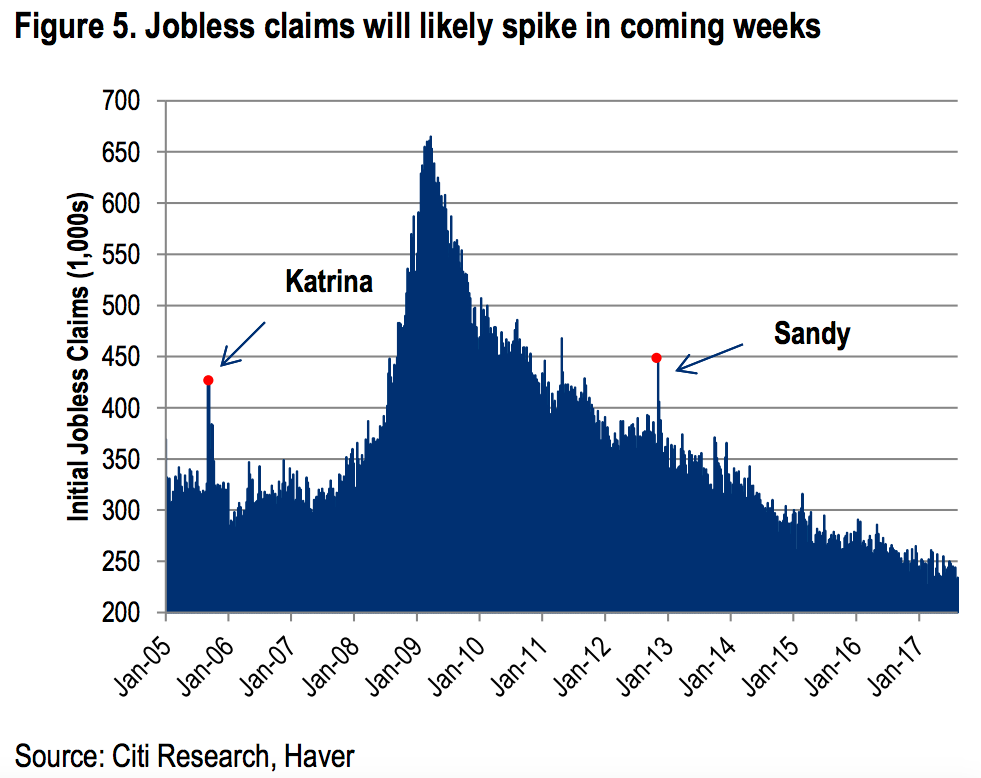

Here we utilize the "OUI Initial Claims" API (http://api.dol.gov/V1/Statistics/OUI_InitialClaims) provided by the US Department of Labor to visualize an updated version of the plot to see if spikes occurred after the recent hurricanes Harvey and Irma.

In [52]:
import os, sys, re, json, time, requests, requests_cache
from datetime import datetime
import matplotlib
from copy import deepcopy
from subprocess import check_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import Layout
from astropy.time import Time
from IPython.display import display, HTML, Markdown
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.models import Span
from bokeh.io import output_notebook
from bkcharts import TimeSeries
from sodapy import Socrata

sns.set_style('white')

%matplotlib inline
#import mpld3
#mpld3.enable_notebook()

output_notebook()

requests_cache.install_cache('economic_impacts')

Loading BokehJS ...

In [53]:
# set api keys
uhero_api_key = "TfatymKhLiOjnq23S7CzxZGQvqiXj4r0nBj-2NEe0P0="
dol_api_key = "5bad4588-c5b5-4f24-bfe8-0b79875f779a"
hi_api_key = "VzIMFGoCB9autnPonAWB4XK0z"
bls_api_key = "48858038fd4c4b7ca06d4d9fe8fb5590"

## Plot National Initial Unemployment Claims and Unemployment Rates

In [54]:
oui_api_url = "http://api.dol.gov/V1/Statistics/OUI_InitialClaims"

# define function to convert from EDM.DateTime (milliseconds since epoch)
# to datetime
def ms_to_dt(ms):
    #return datetime.fromtimestamp(ms/1000. + 8 * 3600.)
    return datetime.fromtimestamp(ms/1000.)

# collect all data for initial claims
url = "%s/unemploymentInsuranceInitialClaims/?" % oui_api_url
results = []
while True:
    r = requests.get("%s&KEY=%s" % (url, dol_api_key), 
                     headers={'Accept': "application/json"})
    r.raise_for_status()
    res = r.json()
    for i in res['d']['results']:
        dt = int(i['week'].replace('/Date(', '').replace(')/', ''))
        results.append({'date': ms_to_dt(dt),
                        'init_claims': int(i['seasonallyAdjustedInitialClaims'])})
    if '__next' not in res['d']: break
    url = res['d']['__next']
us_init_claims_df = pd.DataFrame(results)
us_init_claims_df.index = us_init_claims_df['date']
us_init_claims_df['date']
display(us_init_claims_df)
#print(json.dumps(results[-1], indent=2))


,date,init_claims
date,,
1967-01-06 16:00:00,1967-01-06 16:00:00,208000
1967-01-13 16:00:00,1967-01-13 16:00:00,207000
1967-01-20 16:00:00,1967-01-20 16:00:00,217000
1967-01-27 16:00:00,1967-01-27 16:00:00,204000
1967-02-03 16:00:00,1967-02-03 16:00:00,216000
1967-02-10 16:00:00,1967-02-10 16:00:00,229000
1967-02-17 16:00:00,1967-02-17 16:00:00,229000
1967-02-24 16:00:00,1967-02-24 16:00:00,242000
1967-03-03 16:00:00,1967-03-03 16:00:00,310000


In [55]:
# get client for Hawaii unemployment API
client = Socrata("data.hawaii.gov", hi_api_key)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("55zd-8crh", limit=2000)

# Convert to pandas DataFrame
hi_unemp_df = pd.DataFrame.from_records(results)
hi_unemp_df = hi_unemp_df.rename(index=str, columns={"month_year": "date"})
hi_unemp_df.date = pd.to_datetime(hi_unemp_df.date)
hi_unemp_df.index = hi_unemp_df.date
hi_unemp_df.unemployment_rate = pd.to_numeric(hi_unemp_df.unemployment_rate)
hi_unemp_df.civilian_labor_force = pd.to_numeric(hi_unemp_df.civilian_labor_force)
hi_unemp_df.employed = pd.to_numeric(hi_unemp_df.employed)
hi_unemp_df.unemployed = pd.to_numeric(hi_unemp_df.unemployed)
display(hi_unemp_df)
#hi_unemp_df.describe()

,civilian_labor_force,employed,date,notes,unemployed,unemployment_rate
date,,,,,,
1990-01-01,26400,25400,1990-01-01,NaN,1050,3.9
1990-02-01,26200,25300,1990-02-01,NaN,950,3.6
1990-03-01,26100,25050,1990-03-01,NaN,1000,3.9
1990-04-01,25950,24900,1990-04-01,NaN,1050,4.0
1990-05-01,25800,24850,1990-05-01,NaN,950,3.7
1990-06-01,26150,25000,1990-06-01,NaN,1150,4.4
1990-07-01,26300,25250,1990-07-01,NaN,1100,4.1
1990-08-01,26200,25300,1990-08-01,NaN,850,3.3
1990-09-01,25550,24600,1990-09-01,NaN,1000,3.8


In [56]:
# plot time series using matplotlib
#df['1/1/1992':'12/31/1993'].plot()
#df.plot()
#ax.axvline(pd.to_datetime('1992-09-11'), color='r', linestyle='--', lw=1)

# function to return span for hurricane
def get_span(yr, mo, dy, color='green'):
    dt = time.mktime(datetime(yr, mo, dy, 0, 0, 0).timetuple())*1000
    return Span(location=dt, dimension='height', line_color=color,
                line_dash='dashed', line_width=1)
    
# plot time series using bokeh
us_fig = TimeSeries(us_init_claims_df, legend=False, 
                    title="US - Initial Unemployment Claims", color='blue',
                    xlabel='date', ylabel="claims", plot_width=750, 
                    plot_height=400)
us_fig.add_layout(get_span(1992, 9, 11)) # add spand for hurricane iniki
show(us_fig)
hi_fig = TimeSeries(hi_unemp_df['unemployment_rate'], legend=False, 
                    title="Kauai - Unemployment Rates", color='red',
                    xlabel='date', ylabel="unemployment rate", plot_width=750, 
                    plot_height=400)
hi_fig.add_layout(get_span(1992, 9, 11)) # add spand for hurricane iniki
show(hi_fig)

E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='0d19cd80-d023-4705-ade5-bc2dd4a0868f', ...)


E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='5546b2a2-3fcc-4489-95bb-9ced279bbec5', ...)


In [57]:
# show table of unemployed before and after iniki hit
display(hi_unemp_df.loc['1992-07-01':'1992-12-01'])

,civilian_labor_force,employed,date,notes,unemployed,unemployment_rate
date,,,,,,
1992-07-01,29350,27200,1992-07-01,NaN,2150,7.3
1992-08-01,29100,27150,1992-08-01,NaN,1950,6.8
1992-09-01,28100,26350,1992-09-01,NaN,1750,6.2
1992-10-01,29700,23400,1992-10-01,NaN,6250,21.1
1992-11-01,29350,23800,1992-11-01,NaN,5600,19.0
1992-12-01,28550,24250,1992-12-01,NaN,4300,15.1


In [58]:
bls_api_url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
headers = {'Content-type': 'application/json'}
query = {"seriesid": ['LAUST720000000000003'], "startyear":"2008", "endyear":"2017"}
r = requests.post(bls_api_url, data=json.dumps(query), headers=headers)
r.raise_for_status()
results = r.json()['Results']['series'][0]['data']

# Convert to pandas DataFrame
fixed_results = []
for i in results:
    year = int(i['year'])
    month = int(i['period'][1:])
    #value = np.nan if i['value'] == '-' else float(i['value'])
    if i['value'] == '-': continue
    else: value = float(i['value'])
    fixed_results.append({
        'date': datetime(year, month, 1),
        'unemployment_rate': value,
    })
pr_unemp_df = pd.DataFrame.from_records(fixed_results)
pr_unemp_df.index = pr_unemp_df.date
pr_unemp_df.unemployment_rate = pd.to_numeric(pr_unemp_df.unemployment_rate)
display(pr_unemp_df)

,date,unemployment_rate
date,,
2017-10-01,2017-10-01,11.4
2017-08-01,2017-08-01,11.7
2017-07-01,2017-07-01,10.4
2017-06-01,2017-06-01,9.4
2017-05-01,2017-05-01,10.3
2017-04-01,2017-04-01,11.5
2017-03-01,2017-03-01,11.0
2017-02-01,2017-02-01,11.3
2017-01-01,2017-01-01,11.7


In [59]:
pr_fig = TimeSeries(pr_unemp_df['unemployment_rate'], legend=False, 
                    title="PR - Unemployment Rates", color='red',
                    xlabel='date', ylabel="unemployment rate", plot_width=750, 
                    plot_height=400)
pr_fig.add_layout(get_span(2017, 9, 20)) # add span for hurricane maria
show(pr_fig)

E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='dd2b2c47-7e3b-4137-af45-a72115610e43', ...)


# Vulnerability Assessment

In [60]:
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap

In [61]:
themes = ['tourism GDP', 'manufacturing GDP', 'poverty level', 'food import'] 
areas = ['Hawaii', 'PR']
vul_data = {
    "themes": themes,
    "Hawaii": [22, 2.4, 11, 85],
    "PR": [8, 46.9, 45.5, 80]
}
x = [ (theme, area) for theme in themes for area in areas ]
counts = sum(zip(vul_data['Hawaii'], vul_data['PR']), ()) # like an hstack
source = ColumnDataSource(data=dict(x=x, counts=counts))
vul_fig = figure(x_range=FactorRange(*x), plot_width=750, 
                 plot_height=400,  title="Vulnerability Assessment Themes")
vul_fig.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
            fill_color=factor_cmap('x', palette=Spectral6, factors=areas, start=1, end=2))
vul_fig.y_range.start = 0
vul_fig.x_range.range_padding = 0.1
vul_fig.xaxis.major_label_orientation = 1
vul_fig.xgrid.grid_line_color = None
vul_fig.yaxis.axis_label = "%"
show(vul_fig)

In [62]:
hi_exp_markets = ['US', 'Japan', 'Canada', 'Other']
hi_exp_dists = [70, 15.5, 5, 9.5]

source = ColumnDataSource(data=dict(markets=hi_exp_markets, dists=hi_exp_dists))

hi_exp_fig = figure(x_range=hi_exp_markets, plot_width=750, plot_height=400,
                    title="Market Distribution of Largest Hawaii Export - Tourism")
hi_exp_fig.vbar(x='markets', top='dists', width=0.9, source=source, 
                line_color='white',
                fill_color=factor_cmap('markets', 
                                       palette=Spectral6,
                                       factors=hi_exp_markets))
hi_exp_fig.xgrid.grid_line_color = None
hi_exp_fig.y_range.start = 0
hi_exp_fig.yaxis.axis_label = "%"
show(hi_exp_fig)

In [63]:
pr_exp_markets = ['US', 'Belgium', 'Netherlands', 'Spain', 'Austria']
pr_exp_dists = [75.1, 5.7, 3.7, 2.1, 2]

source = ColumnDataSource(data=dict(markets=pr_exp_markets, dists=pr_exp_dists))

pr_exp_fig = figure(x_range=pr_exp_markets, plot_width=750, plot_height=400,
                    title="Market Distribution of Largest Puerto Rico Export - Manufacturing")
pr_exp_fig.vbar(x='markets', top='dists', width=0.9, source=source, 
                line_color='white',
                fill_color=factor_cmap('markets', 
                                       palette=Spectral6,
                                       factors=pr_exp_markets))
pr_exp_fig.xgrid.grid_line_color = None
pr_exp_fig.y_range.start = 0
pr_exp_fig.yaxis.axis_label = "%"
show(pr_exp_fig)

# Plot Civilian Labor Force

In [64]:
hi_fig = TimeSeries(hi_unemp_df['civilian_labor_force'], legend=False, 
                    title="Kauai - Civilian Labor Force", color='red',
                    xlabel='date', ylabel="civilian labor force", plot_width=750, 
                    plot_height=400)
hi_fig.add_layout(get_span(1992, 9, 11)) # add spand for hurricane iniki
show(hi_fig)

E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='c2ddc323-0e25-4a72-8994-9378f8b778b2', ...)


In [65]:
query = {"seriesid": ['LAUST720000000000006'], "startyear":"2008", "endyear":"2017"}
r = requests.post(bls_api_url, data=json.dumps(query), headers=headers)
r.raise_for_status()
results = r.json()['Results']['series'][0]['data']

# Convert to pandas DataFrame
fixed_results = []
for i in results:
    year = int(i['year'])
    month = int(i['period'][1:])
    #value = np.nan if i['value'] == '-' else float(i['value'])
    if i['value'] == '-': continue
    else: value = float(i['value'])
    fixed_results.append({
        'date': datetime(year, month, 1),
        'labor_force': value,
    })
pr_lf_df = pd.DataFrame.from_records(fixed_results)
pr_lf_df.index = pr_lf_df.date
pr_lf_df.labor_force = pd.to_numeric(pr_lf_df.labor_force)
display(pr_lf_df)

,date,labor_force
date,,
2017-10-01,2017-10-01,1061157.0
2017-08-01,2017-08-01,1096951.0
2017-07-01,2017-07-01,1095817.0
2017-06-01,2017-06-01,1087821.0
2017-05-01,2017-05-01,1103366.0
2017-04-01,2017-04-01,1119900.0
2017-03-01,2017-03-01,1127107.0
2017-02-01,2017-02-01,1147020.0
2017-01-01,2017-01-01,1124443.0


In [66]:
pr_fig = TimeSeries(pr_lf_df['labor_force'], legend=False, 
                    title="PR - Civilian Labor Force", color='red',
                    xlabel='date', ylabel="civilian labor force", plot_width=750, 
                    plot_height=400)
pr_fig.add_layout(get_span(2017, 9, 20)) # add span for hurricane maria
show(pr_fig)

E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='73914175-e9f3-4e98-aebe-a3c6df2860af', ...)
